In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [119]:
Boston = pd.read_csv("HousingData.csv")
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [120]:
#Statistical information of the Boston dataset
Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [121]:
Boston.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [122]:
Boston = Boston.dropna()

In [123]:
Boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## PREPROCESSING THE DATA

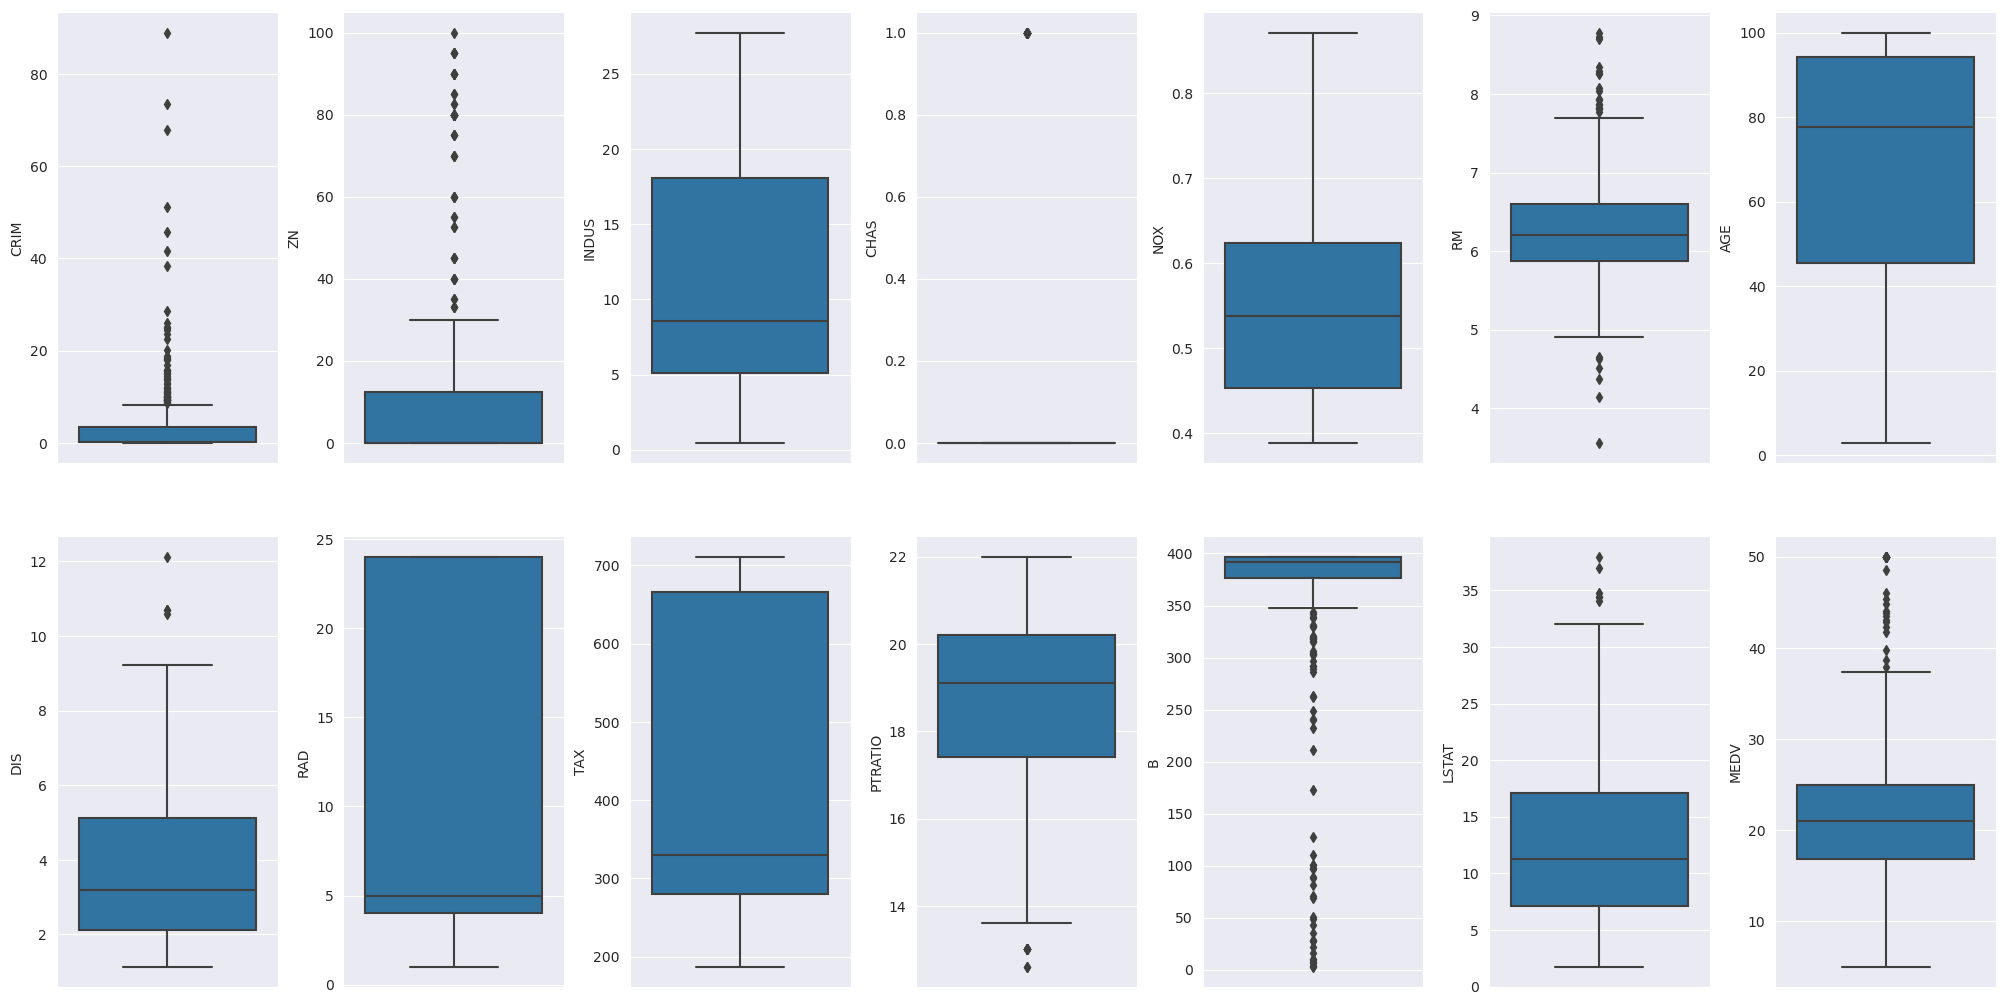

In [124]:
#Create Box plots
fig, axis = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index =  0
axis = axis.flatten()
for col,value in Boston.items():
    sns.boxplot(y=col,data=Boston,ax=axis[index])
    index +=1
    
plt.tight_layout(w_pad=0.7,pad=0.5,h_pad=5.0)

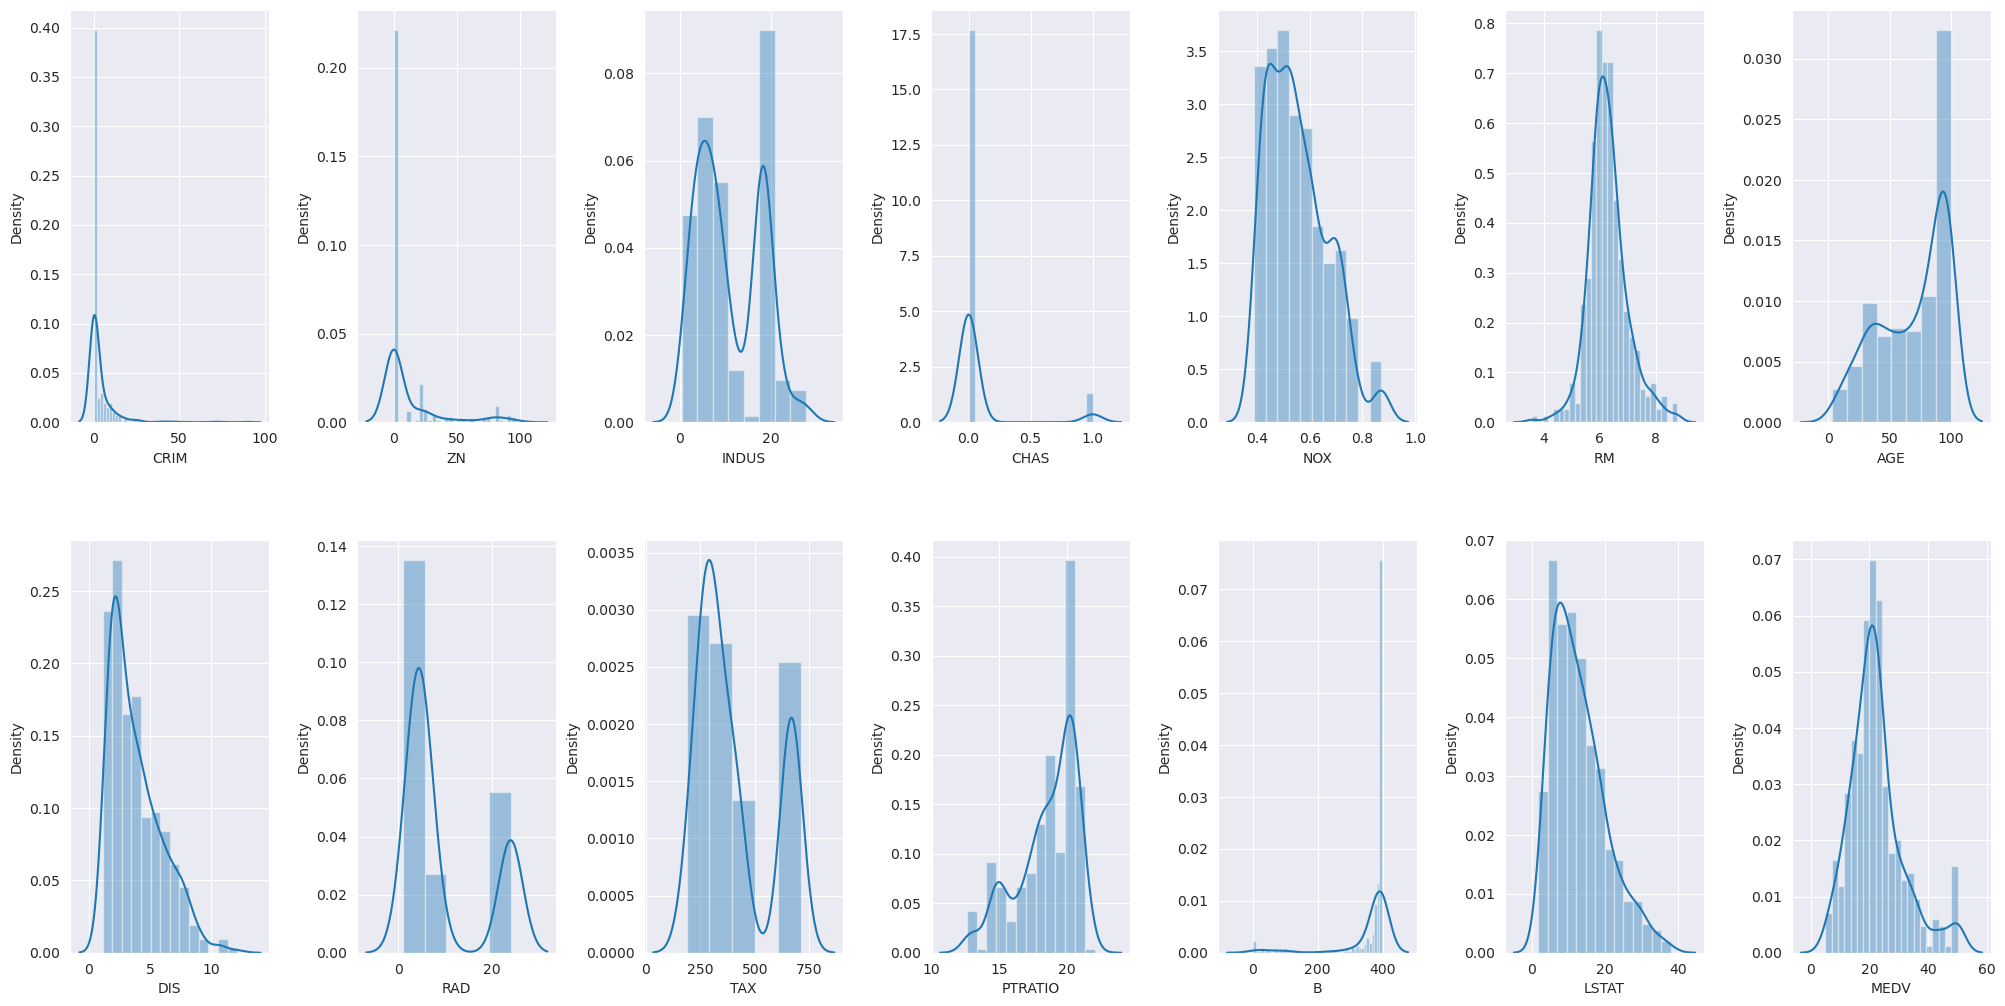

In [125]:
#Create dist plots
fig, axis = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index =  0
axis = axis.flatten()
for col,value in Boston.items():
    sns.distplot(value,ax=axis[index])
    index +=1

plt.tight_layout(w_pad=0.7,pad=0.5,h_pad=5.0)

## MIN MAX NORMALIZATION

In [126]:
cols = ['CRIM','ZN','TAX','B']
for col in cols:
    # find minimum and max of that column
    minimum = min(Boston[col])
    maximum = max(Boston[col])
    Boston[col] = (Boston[col] -minimum)/(maximum - minimum)

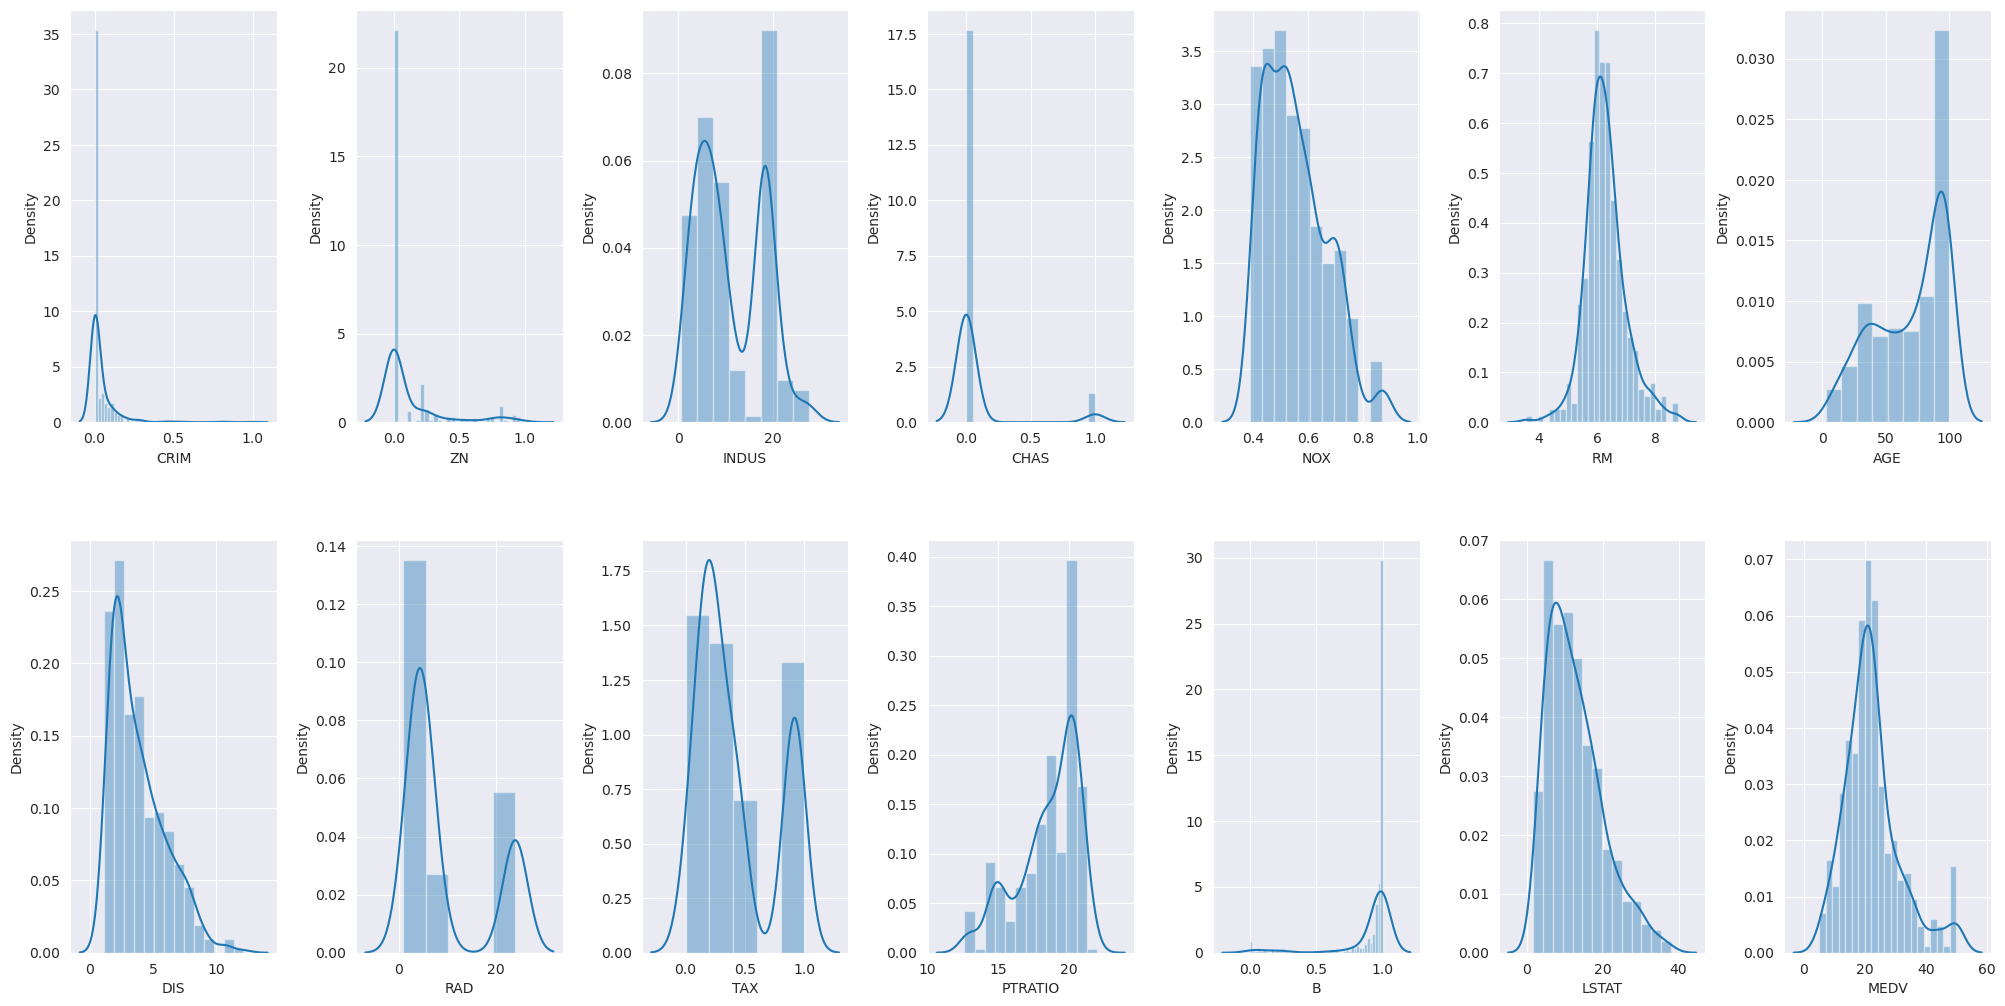

In [127]:
fig, axis = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index =  0
axis = axis.flatten()
for col,value in Boston.items():
    sns.distplot(value,ax=axis[index])
    index +=1

plt.tight_layout(w_pad=0.7,pad=0.5,h_pad=5.0)

##  Standardization

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit our data 
scaled_cols = scaler.fit_transform(Boston[cols])
scaled_cols = pd.DataFrame(scaled_cols,columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.400818,0.273342,-0.656944,0.430740
1,-0.398535,-0.479051,-0.978184,0.430740
2,-0.398537,-0.479051,-0.978184,0.385097
3,-0.397984,-0.479051,-1.097162,0.405283
4,-0.398258,-0.479051,-1.097162,0.399564


In [129]:
for col in cols:
    Boston[col] = scaled_cols[col]

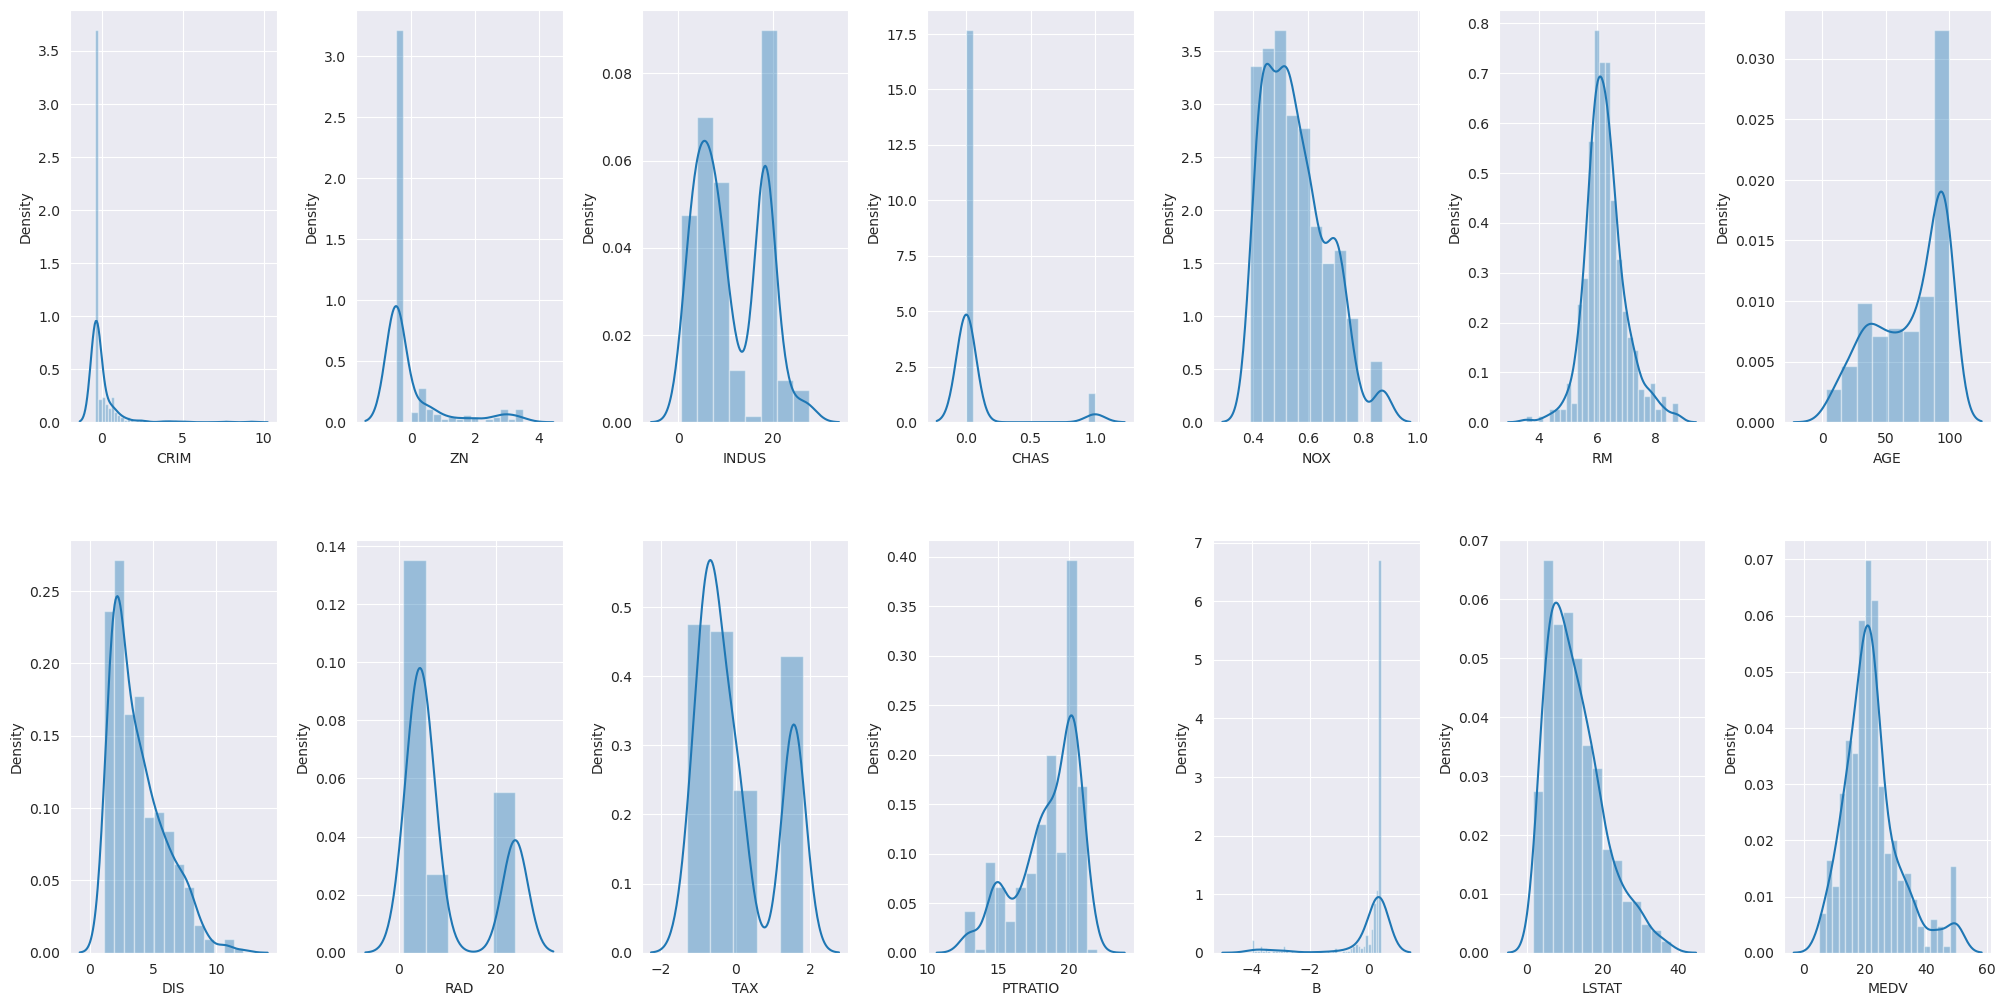

In [130]:
fig, axis = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index =  0
axis = axis.flatten()
for col,value in Boston.items():
    sns.distplot(value,ax=axis[index])
    index +=1

plt.tight_layout(w_pad=0.7,pad=0.5,h_pad=5.0)

<AxesSubplot: >

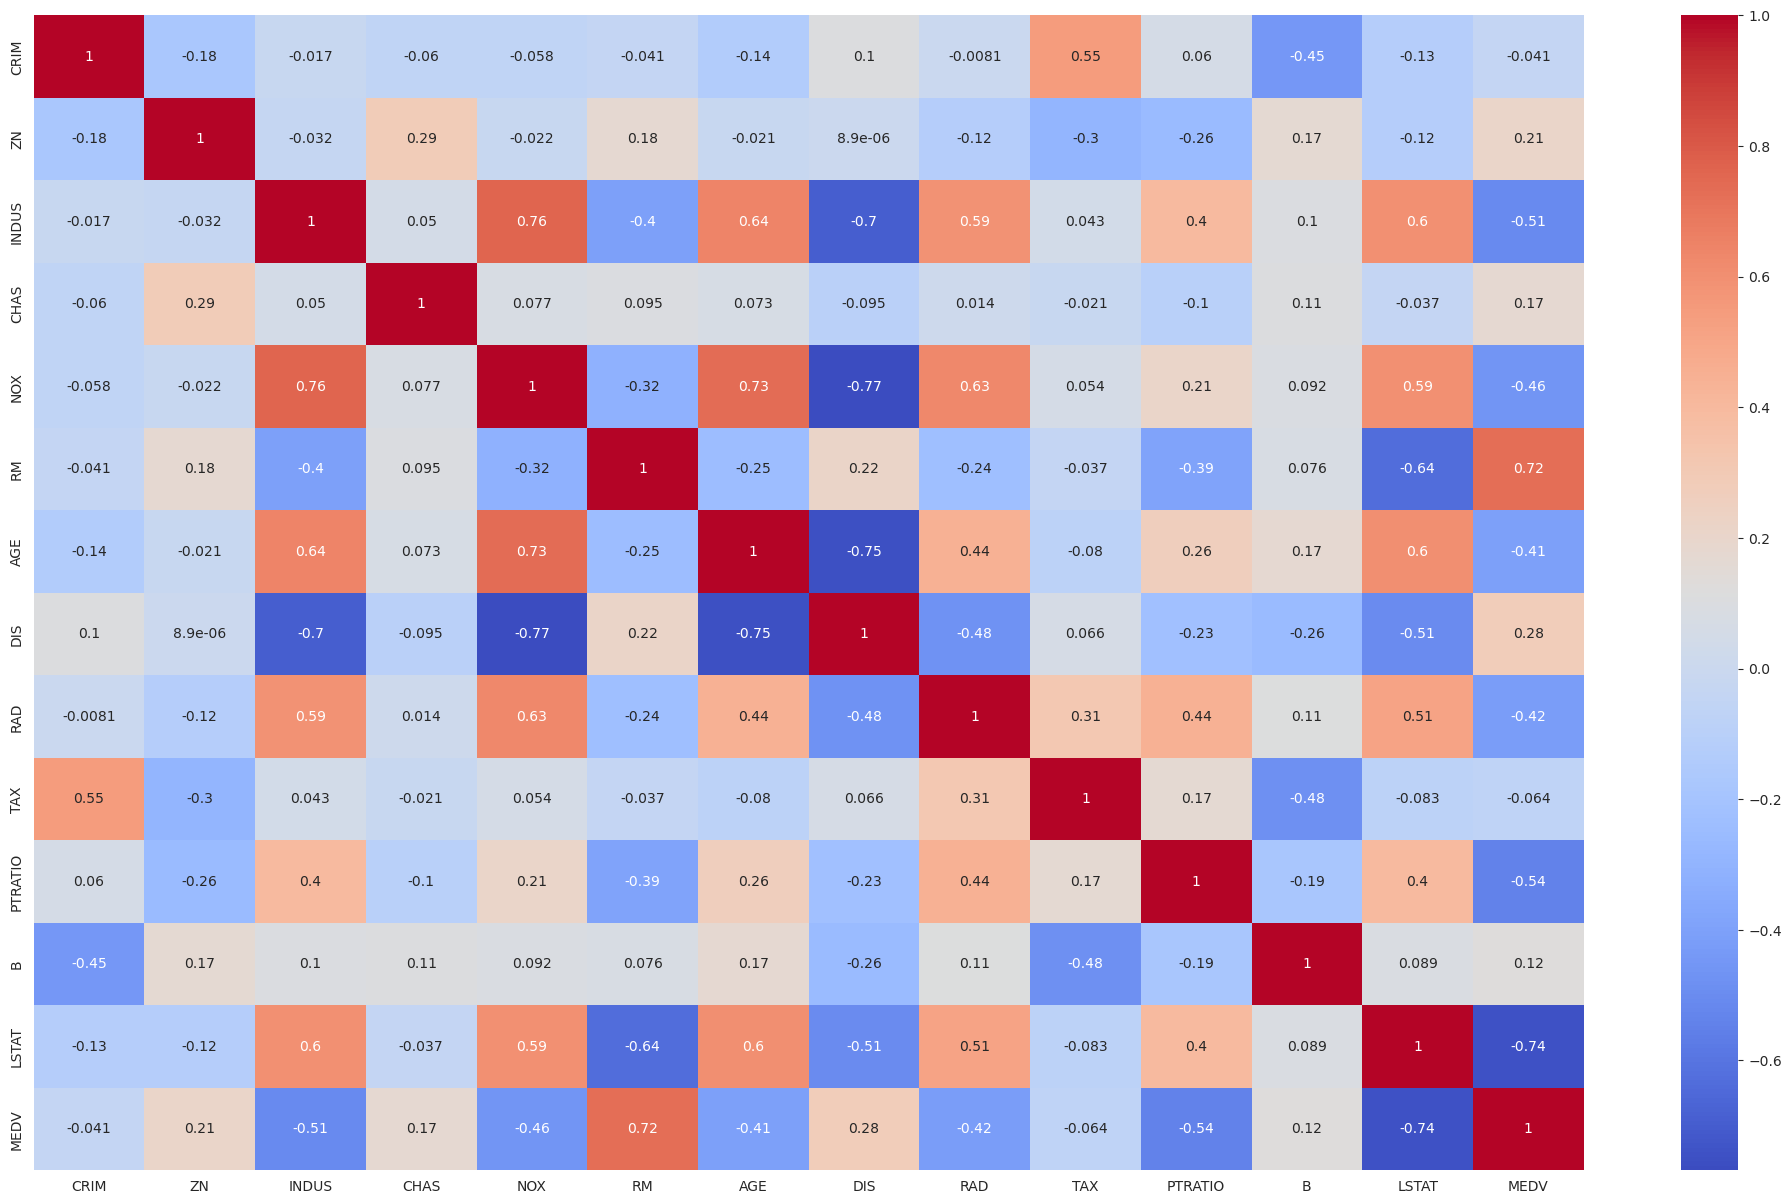

In [131]:
corr = Boston.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot= True,cmap='coolwarm')

<AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>

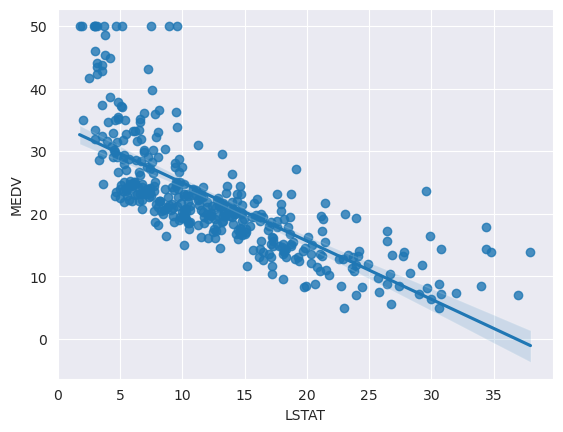

In [132]:
sns.regplot(y=Boston['MEDV'],x=Boston["LSTAT"])

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

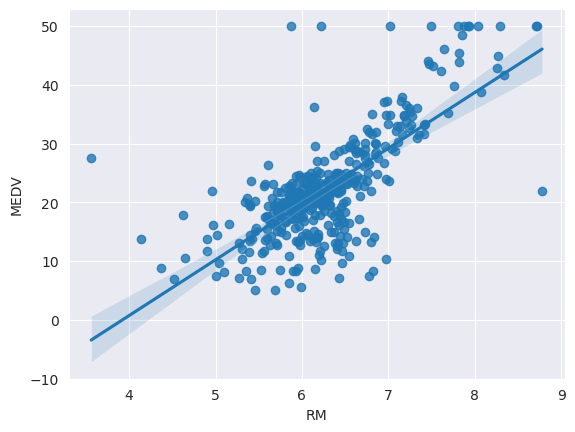

In [133]:
sns.regplot(y=Boston['MEDV'],x=Boston["RM"])

In [134]:
Boston = Boston.dropna()

In [135]:
X = Boston.drop(columns=['MEDV','RAD'],axis=1)
y = Boston['MEDV']

In [136]:
X.shape, y.shape

((307, 12), (307,))

In [137]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error

def train_model(model,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    cv_score = cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model score ",model.score(X_test,y_test).round(4))
    print("Model Report")
    print("MSE: ",mean_squared_error(y_test,pred))
    print("CV Score: ",cv_score)

Model score  0.6667
Model Report
MSE:  26.03912609894922
CV Score:  34.63810334732703


<AxesSubplot: title={'center': 'model coefficients'}>

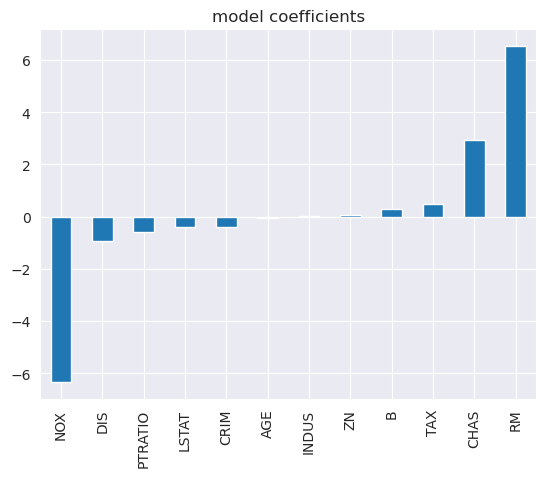

In [138]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
train_model(model_linear,X,y)
coef = pd.Series(model_linear.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='model coefficients')

Model score  0.663
Model Report
MSE:  26.333636363636366
CV Score:  35.11573030142782


<AxesSubplot: title={'center': 'Feature importance'}>

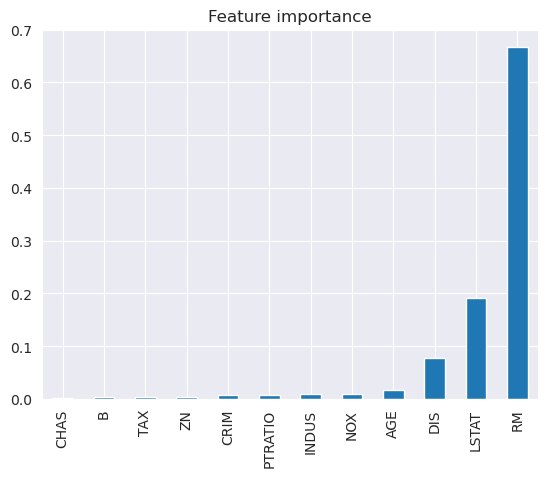

In [139]:
from sklearn.tree import DecisionTreeRegressor

model_dtree = DecisionTreeRegressor()
train_model(model_dtree,X,y)
coef = pd.Series(model_dtree.feature_importances_,X.columns).sort_values()
coef.plot(kind='bar',title='Feature importance')

Model score  0.6925
Model Report
MSE:  24.024163142857173
CV Score:  22.346356447699627


<AxesSubplot: title={'center': 'Feature importance'}>

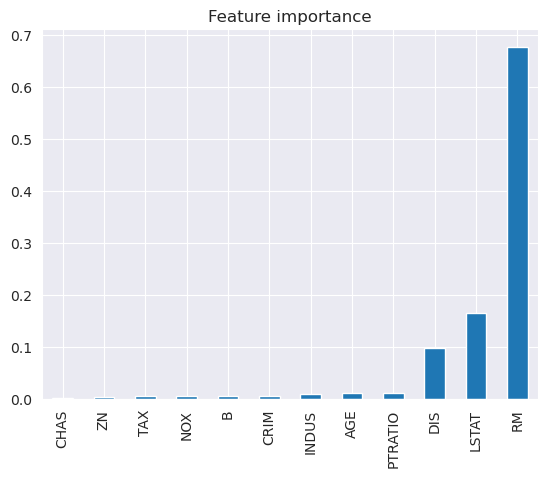

In [140]:
from sklearn.ensemble import RandomForestRegressor

model_rforest= RandomForestRegressor()
train_model(model_rforest, X, y)
coef = pd.Series(model_rforest.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title='Feature importance')

Model score  0.7363
Model Report
MSE:  20.60027018181819
CV Score:  24.315457712321518


<AxesSubplot: title={'center': 'Feature importance'}>

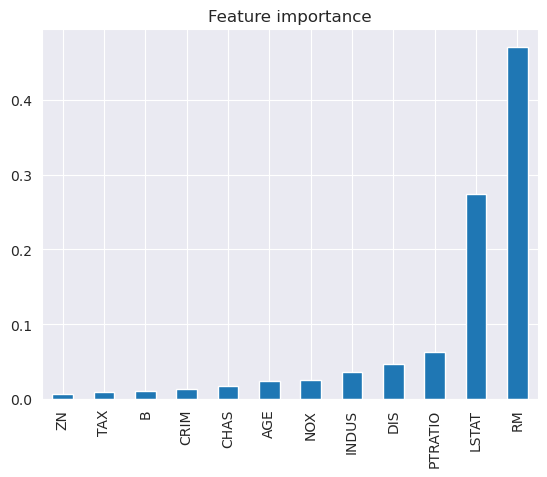

In [141]:
from sklearn.ensemble import ExtraTreesRegressor

model_etree = ExtraTreesRegressor()
train_model(model_etree, X, y)
coef = pd.Series(model_etree.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title='Feature importance')

Model score  0.7682
Model Report
MSE:  18.10984018784525
CV Score:  23.88496598889335


<AxesSubplot: title={'center': 'Feature importance'}>

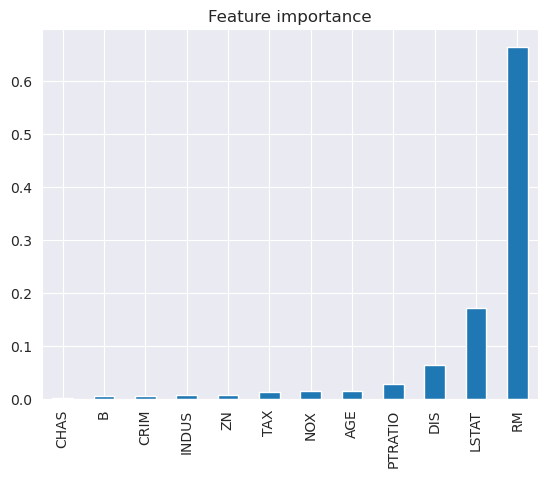

In [142]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor()
train_model(model_xgb, X, y)
coef = pd.Series(model_xgb.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title='Feature importance')

## Using PCA

In [145]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X)
pca_data = pca.transform(X)

In [146]:
#We will only use linear regression to show how reducing the dimensions can affect the model
train_model(model_linear,pca_data,y)

Model score  0.7267
Model Report
MSE:  21.355046283121357
CV Score:  35.12091076818144




Well, I got a very close accuracy after applying the Dimensionality Reduction. But after that, our feature number gets decreased. This is called dimensionality loss. But PCA chooses the best feature for our model.
We set the value 10 to the parameter n_components to let PCA choose 10 features among the total number of features. We can change the value as our own choice. But be careful about the dimensionality loss. Removing too many features sometimes can face an abrupt drop of accuracy of the model.


Sometimes we will notice that Dimensionality Reduction doesn't work very well. Even in this model, it's performance wasn't that satisfactory. What just happened here?
Mainly Dimensionality Reduction removes the features which are strongly correlated with each other more than the target variable. But if we plot a correlation matrics of our dataset, we will see there are no such strong correlation between the features themselves. That's why PCA didn't perform that good in this case.

## Hyperparameter tuning using gridsearch CV

In [147]:
from sklearn.model_selection import GridSearchCV

In [156]:
def train_model_gsv(model, param_grid, X, y, test_size=0.2, cv=5, n_jobs=-1):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Create a GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=n_jobs)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate accuracy (you can replace this with other evaluation metrics)
    cv_score = cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model score ",model.score(X_test,y_test).round(4))
    print("Model Report")
    print("MSE: ",mean_squared_error(y_test,y_pred))
    print("CV Score: ",cv_score)
    print("Best Hyperparameters: ",best_params)
# Example usage:
# Replace RandomForestClassifier and param_grid with your desired model and hyperparameter grid
# best_model, best_params, accuracy = train_and_test_with_gridsearch(RandomForestClassifier(), param_grid, X, y)


In [ ]:
params={
    'n_estimators': [100, 150, 200, 300, 400],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [1, 2, 4, 5, 10],
    'min_samples_leaf': [0.5, 1, 2, 3, 4]
}
train_model_gsv(model=model_rforest,param_grid=params,X=X,y=y)
coef = pd.Series(model_rforest.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title='Feature importance')

By using grid search cv on on our random forest regressor, we can see the best parameters for our model are Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}